In [1]:
# using time module
import time

# ts stores the time in seconds
tstart = time.time()

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('TMC_cleaning.csv')

# Define the features and target
X = data[['TESTER_ID', 'handler_id', 'product_no', 'QTY_IN', 'QTY_OUT']]
y = data['UPH']

# Identify categorical columns
categorical_features = ['TESTER_ID', 'handler_id', 'product_no']

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Leave numerical features as they are
)

# Create the pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Example of predicting UPH for new data
new_data = pd.DataFrame({
    'TESTER_ID': ['ADVT2000-10'],
    'handler_id': ['NS8160-18'],
    'product_no': ['UTIC*TT3920D'],
    'QTY_IN': [10608],
    'QTY_OUT': [8234]
})

predicted_uph = pipeline.predict(new_data)
print(f'Predicted UPH: {predicted_uph[0]}')

Mean Squared Error: 179033641.48447183
Predicted UPH: 1891.7415000000005


In [3]:
# Predict on the entire dataset (including both training and test data)
data['UPH_predicted'] = pipeline.predict(X)

In [4]:
# Create a new DataFrame with the original data and the predicted UPH
new_data = data.copy()

# Display the new DataFrame
print(new_data.head())

# Save the new DataFrame to a CSV file (optional)
new_data.to_csv('data_with_predicted_uph.csv', index=False)

      TESTER_ID     handler_id           product_no TEST_CODE  QTY_IN  \
0   ADVT2000-10      NS8160-18         UTIC*TT3920D        FT   10608   
1   ADVT2000-10      NS8160-18         UTIC*TT3920D        FT     448   
2   ADVT2000-13  EXCEED8016-07         UTIC*TT3920D        FT      30   
3  CRAFT-U64-01   EG4090-W4-08  M29ADE9BSI0UT2910W0        FT   23491   
4  CRAFT-U64-01   EG4090-W4-08  M29ADE9BSI0UT2910W0        FT   23490   

   QTY_OUT       UPH  UPH_predicted  
0     8234    2209.0      1891.7415  
1      416  504315.0    338515.1200  
2       20  692308.0    684501.4400  
3    22986   33540.0     34013.1700  
4    23089   35147.0     33660.0400  


In [5]:
new_data

,TESTER_ID,handler_id,product_no,TEST_CODE,QTY_IN,QTY_OUT,UPH,UPH_predicted
0,ADVT2000-10,NS8160-18,UTIC*TT3920D,FT,10608,8234,2209.00,1891.7415
1,ADVT2000-10,NS8160-18,UTIC*TT3920D,FT,448,416,504315.00,338515.1200
2,ADVT2000-13,EXCEED8016-07,UTIC*TT3920D,FT,30,20,692308.00,684501.4400
3,CRAFT-U64-01,EG4090-W4-08,M29ADE9BSI0UT2910W0,FT,23491,22986,33540.00,34013.1700
4,CRAFT-U64-01,EG4090-W4-08,M29ADE9BSI0UT2910W0,FT,23490,23089,35147.00,33660.0400
...,...,...,...,...,...,...,...,...
77311,TMT-309,NX116-15,AMDG2730DN-J-GE4,FT,16000,15809,4115.00,3845.0286
77312,TMT-309,NX116-15,AMDG2730DN-J-GE4,FT,18491,18004,3799.00,3922.8676
77313,TMT-46,NX116-16,AMDG2730DN-J-GE4,FT,16181,15888,4280.00,4237.1920
77314,TMT-46,NX116-16,AMDG2730DN-J-GE4,FT,25767,25722,4406.00,4322.7431


In [6]:
df2 = new_data[new_data["UPH"] < 60000 ]
df2 = df2[df2["UPH_predicted"] < 60000 ]

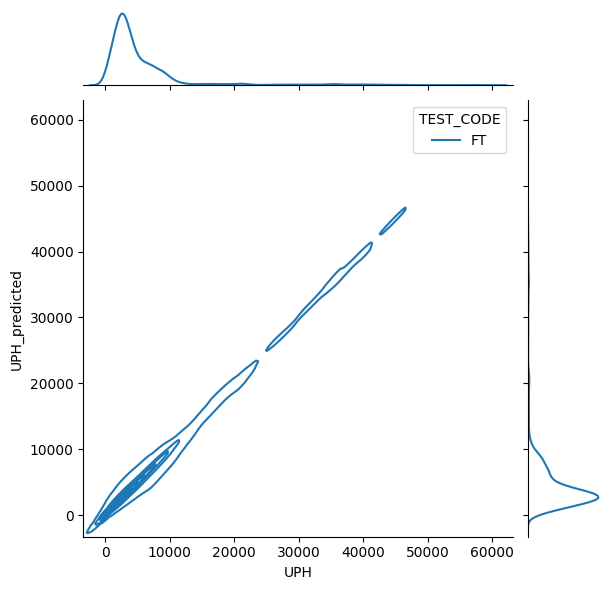

In [7]:
# Show the joint distribution using kernel density estimation
import seaborn as sns

g = sns.jointplot(
    data=df2,
    x="UPH", y="UPH_predicted", hue="TEST_CODE",
    kind="kde",
)

<Axes: xlabel='UPH', ylabel='UPH_predicted'>

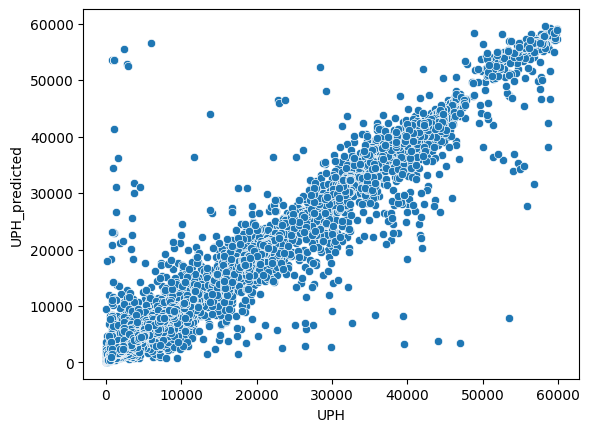

In [8]:
sns.scatterplot(x='UPH', y='UPH_predicted', data=df2)

In [9]:
tstop = time.time()

# print the current timestamp
# print(tstop)
print((tstop-tstart)/3600,"hrs")

0.352616253428989 hrs
